# Uniform Distribution

In [1]:
# environmental variables, settings and imports
%run '000-env.ipynb'

<IPython.core.display.Javascript object>

---

A **uniform distribution** is for the continuous-valued data. It has a single value, 1/(b–a), which occurs in a certain range [a,b], whereas everything is zero outside that range

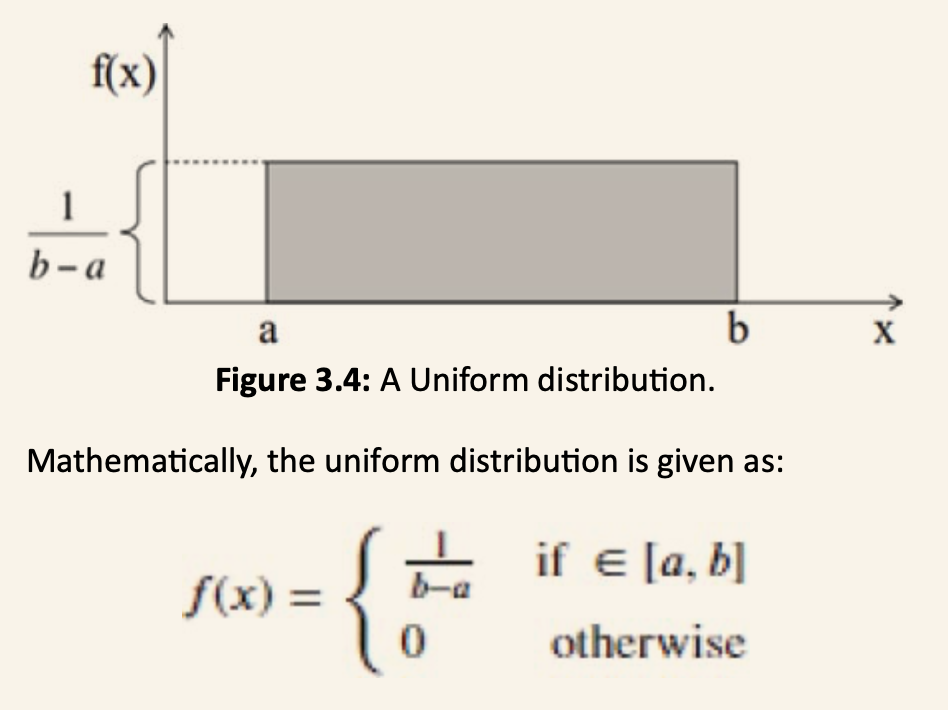

In [15]:
Image('data/uniform_distribution.png', width=400)

above a is the lowest value, whereas b is the highest value

...

X = a real number between a and b (in some instances, X can take on the values a and b). a = smallest X; b = largest X

$X\sim U(a,b)$  where a < x < b

**pdf:** $f(x) = $$1 \over (b-a)$  where $a\leq x \leq b$

**cdf:** $P(X\leq x)=$$x-a \over x-b$

**mean:** $\mu =$$a+b\over 2$

**std:** $\sigma=$$\sqrt{(b-a)^{2} \over12}$

$P(c < X < d)=(d-c)$

.

### German Tank Problem

In the statistical theory of estimation, the problem of estimating the maximum of a discrete uniform distribution from sampling without replacement is known in English as the **German tank problem**, due to its application in World War II to the estimation of the number of German tanks. Estimating the population maximum based on a single sample yields divergent results, while the estimation based on multiple samples is an instructive practical estimation question whose answer is simple but not obvious.

Using a Minimum-variance unbiased estimator we obtain the population max is equal to :

$$ Population\max = sample \max +  \frac{sample \max}{sample \ size} -1 $$

If we for instance captured 5 tanks with the serial numbers 3,7,11,16 then we know the max observed serial number was m=16.
This is our sample max with a sample size of 5 tanks. Plugging into the MVUE results in:

In [1]:
tank_estimate = 16 + (16/5) - 1
tank_estimate

18.2

In [2]:
m=16
k=5
tank_b_estimate = (m-1)*( (k-1)/ ( k-2) )
tank_b_estimate

20.0

Remember, this is still missing the STD

.

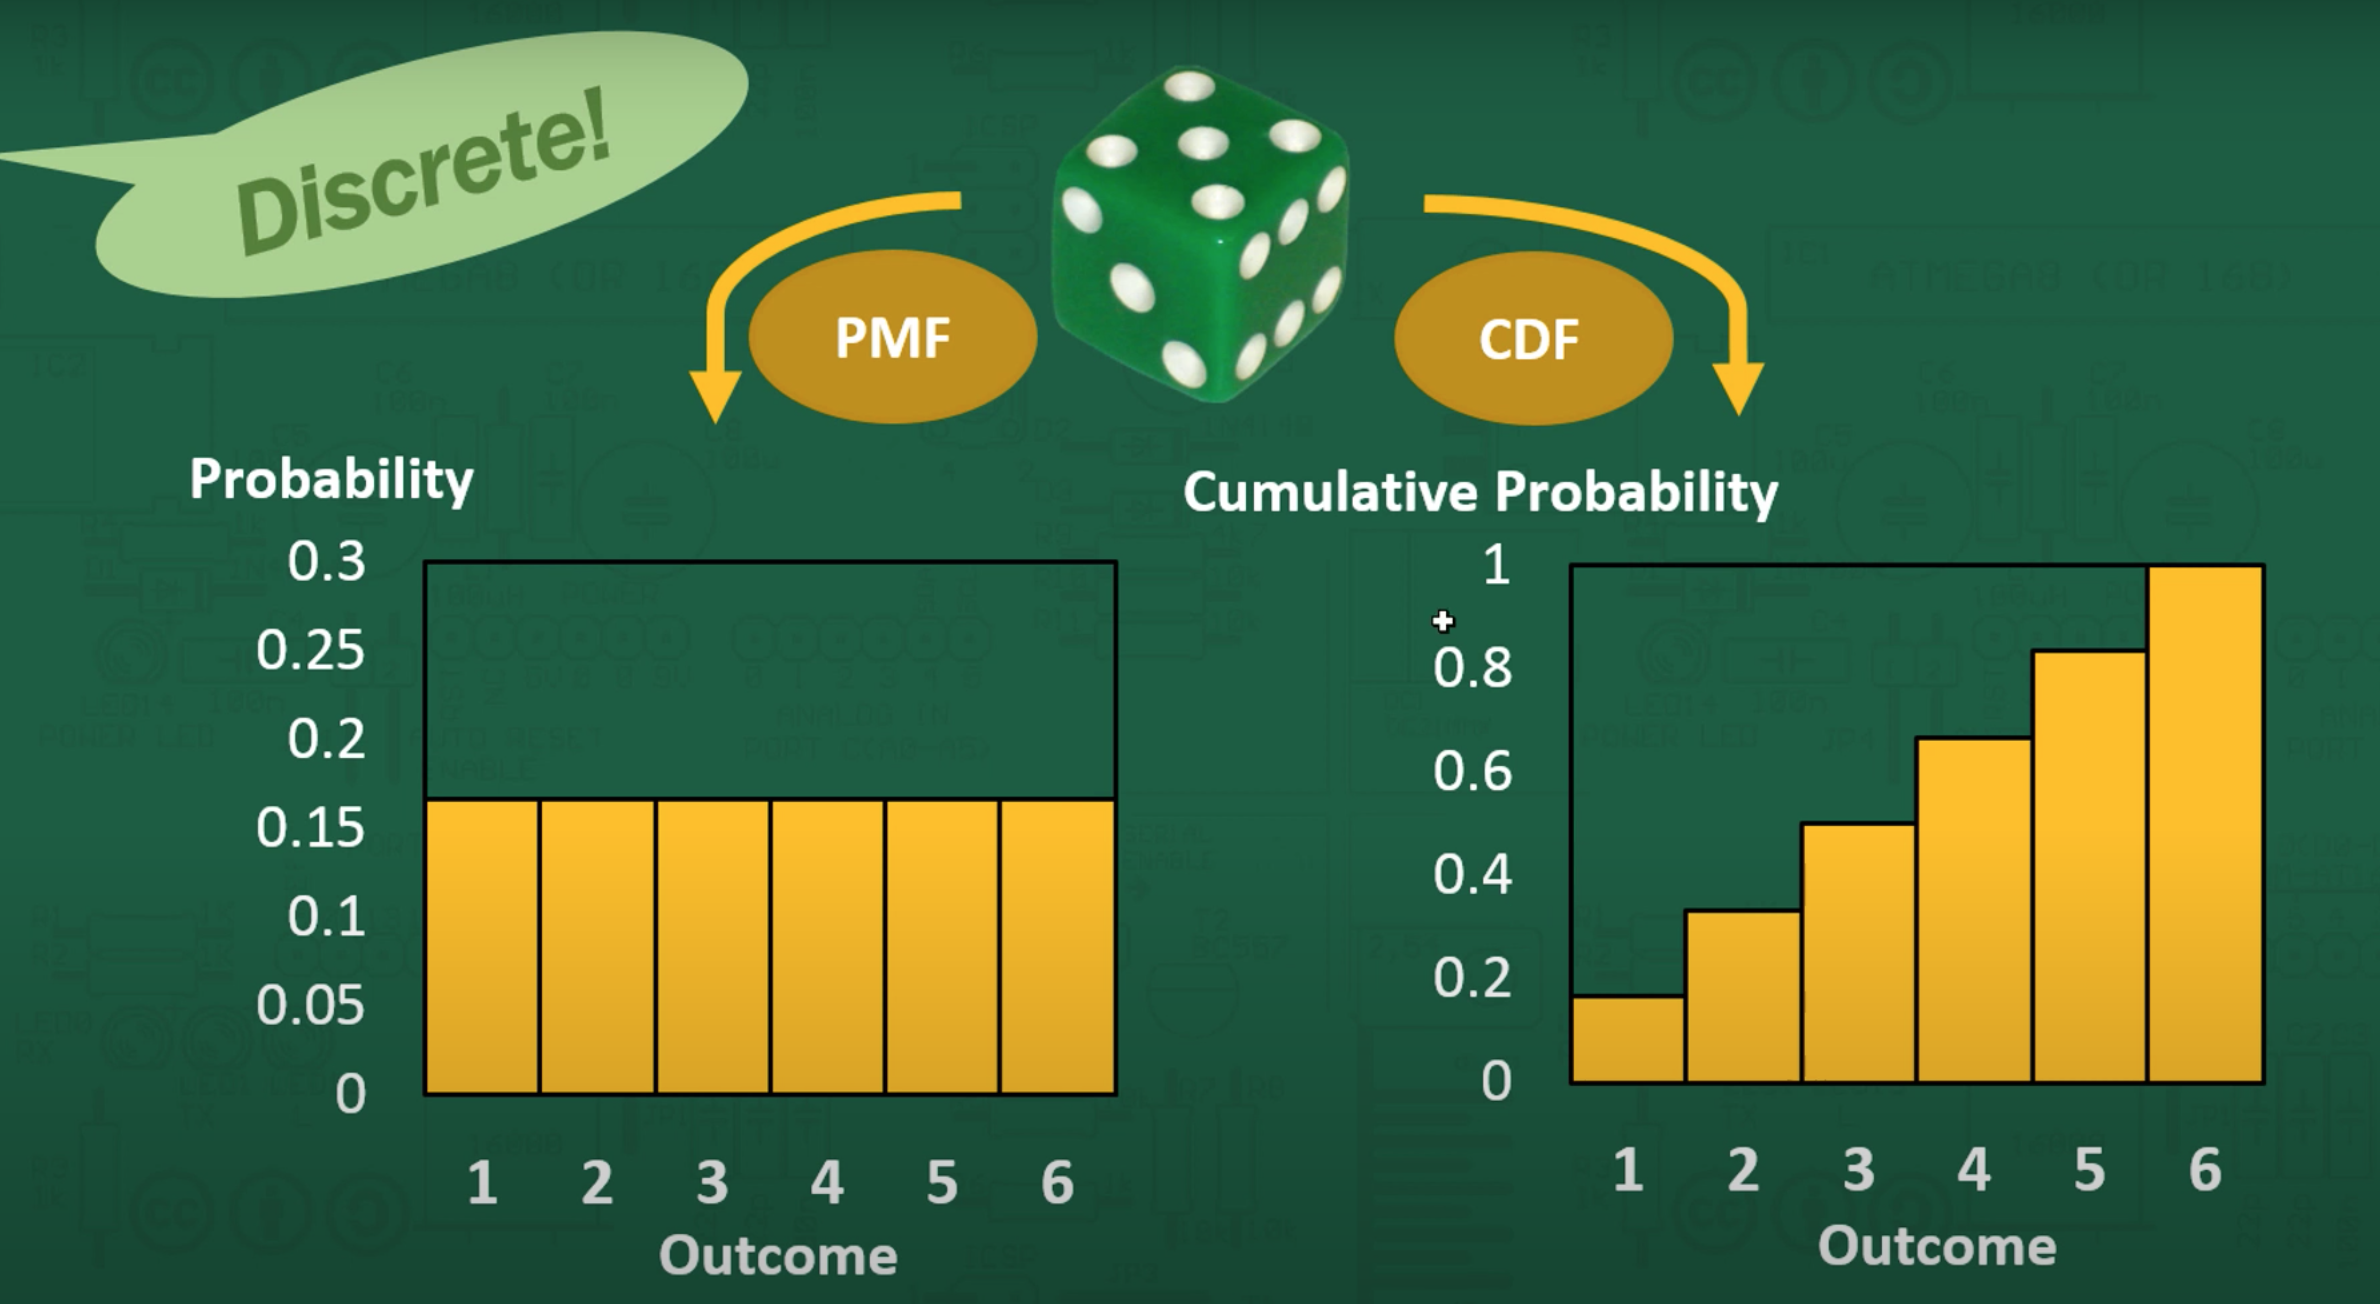

In [11]:
Image('data/ProbDistFunc-1.png', width=300)

---

## Resources

https://courses.lumenlearning.com/introstats1/chapter/the-uniform-distribution/

.

### Continuous Statistical Distributions: Scipy

https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous.html

.

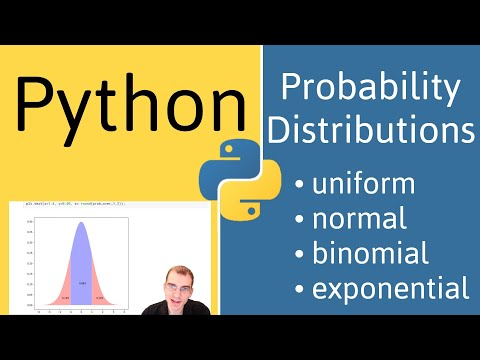

In [9]:
YouTubeVideo('uial-2girHQ')

---

## Examples

<span style="font-size:large; color:blue; font-weight:bold">
You roll a fair dice...
</span>

<span style="font-size:large; color:blue">
a) probability of getting any of the possibilities between 1 and 6
</span>

In [2]:
# each roll has same probability
p=1/6;p

0.16666666666666666

In [3]:
# discrete uniform distribution PMF
x = np.arange(1,7) # [1,2,3,4,5,6]
low = 1; high = 7 # up to 7

y = stats.randint.pmf(x, low, high)

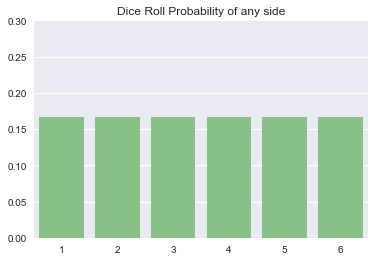

In [4]:
# PMF bar plot for discrete uniform distribution
ax=sns.barplot(x=x, y=y, color=COLOR1)
ax.set(ylim=(0,.3));
ax.set_title("Dice Roll Probability of any side");

any of the side has the same probability: 1/6

.

<span style="font-size:large; color:blue">
b) probability of getting at least 4
</span>

this means a probability of 1,2,3 or 4 

In [5]:
# CDF function for discrete uniform distirbution
y = stats.randint.cdf(x, low, high)

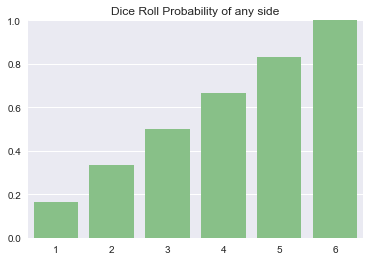

In [6]:
# CDF bar plot for discrete uniform distribution
ax=sns.barplot(x=x, y=y, color=COLOR1)
ax.set(ylim=(0,1));
ax.set_title("Dice Roll Probability of any side");

In [7]:
# <=4
stats.randint.cdf(x, 1, 7)[3]

0.6666666666666666

...

<span style="font-size:large;color:blue;font-weight:bold">
The amount of time, in minutes, that a person must wait for a bus is uniformly distributed between zero and 15 minutes, inclusive.
</span>

<span style="font-size:large;color:blue;">
What is the probability that a person waits fewer than 12.5 minutes?
</span>

In [44]:
stats.uniform.cdf(x=12.5,        # Cutoff value (quantile) to check
                  loc=0,         # Distribution start
                  scale=(15-0))  # Distribution end

0.8333333333333334

<span style="font-size:large;color:blue;">
On the average, how long must a person wait?
</span>

...find $\mu$ and $\sigma$ 

In [45]:
# mean of a continous uniform distribution
stats.uniform.mean(loc=0, scale=(15-0))

7.5

In [46]:
# standard deviation of a continous uniform distribution
stats.uniform.std(loc=0, scale=(15-0))

4.330127018922194

<span style="font-size:large;color:blue;">
Ninety percent of the time, the time a person must wait falls below what value?
</span>

This asks for the 90th percentile.

In [47]:
# 90% percentile of the continous unfiorm distribution
stats.uniform.ppf(q=0.9,         # Probability cutoff
                  loc=0,         # Distribution start
                  scale=(15-0))      # Distribution end

13.5

.

<span style="font-size:large;color:blue;">
<b>Suppose the time it takes a student to finish a quiz is uniformly distributed between six and 15 minutes, inclusive.  </b>
<br/> Find the probability that a randomly selected student needs at least eight minutes to complete the quiz.
</span>

$P(x>8)=0.7778$

The notation for the uniform distribution is $X\sim U(a,b)$ where a = the lowest value of x and b = the highest value of x. 

The probability density function is $f(x)=1/b-a$ for $a≤x≤b$.

In [98]:
a, b = 6, 15
p = 1/(b-a)
p

0.1111111111111111

In [100]:
# between 8 min and 15 min there are 7 units
diff = 15-8; diff

7

In [101]:
# P(x>8)
p*diff

0.7777777777777777

..with scipy

In [42]:
# calculate scale!
lower = loc = 6
upper = 15
scale = upper - lower

# sf: survival function between 8 and 15 min.
stats.uniform.sf(8, loc, scale)

0.7777777777777778

.

<span style="font-size:large;color:blue;">
Then find the probability that a different student needs at least eight minutes to finish the quiz given that she has already taken more than seven minutes.
</span>

$P(x>8 | x>7) = 0.875$

In [109]:
# already 7 min past, so new distribution is between 7 and 15
(1/(15-7))*(15-8)

0.875

.

<span style="font-size:large;color:blue;font-weight:bold">
Ace Heating and Air Conditioning Service finds that the amount of time a repairman needs to fix a furnace is uniformly distributed between 1.5 and four hours.
</span>

<span style="font-size:large;color:blue;">
the probability that a randomly selected furnace repair requires more than two hours.
</span>

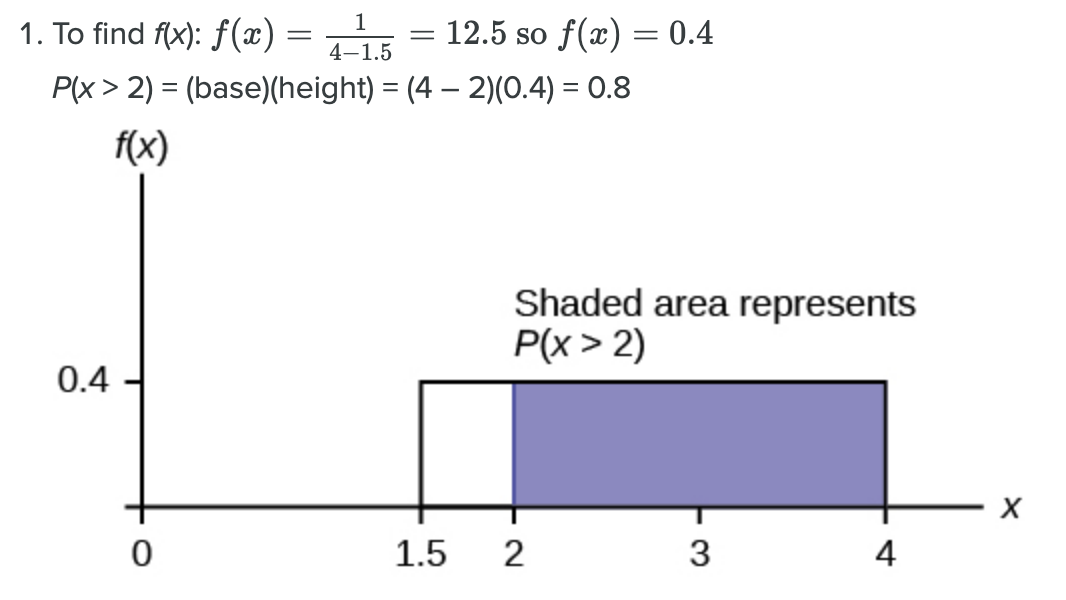

In [129]:
Image('data/uniform_sample_1.png', width=400)

In [138]:
# PDF or probability of each hour to occur
f = 1/(4-1.5); f

0.4

In [148]:
# probability of occurence between 2 and 4: (4-2)
p = (4-2)*f; p

0.8

*Solution with Scipy:* https://stats.stackexchange.com/questions/554364/scipy-continuous-uniform-distributions-cdf

Pr(𝑙<𝑋<𝑢)=Pr(𝑋<𝑢)−Pr(𝑋<𝑙)=∫𝑢𝑙𝑓(𝑥)𝑑𝑥 , so you can use the cumulative distribution functions. This takes the area till 𝑢 and subtracts from it the left tail ending at 𝑙.

In [49]:
# calculate scale!
lower, upper = 1.5, 4
loc = lower
scale = upper-lower

# survival function to capture between 2 and 4
stats.uniform.sf(2, loc, scale)

0.8

<span style="font-size:large;color:blue">Find the 30th percentile of furnace repair times.</span>

In [56]:
stats.uniform.ppf(q=0.3, loc=loc, scale=scale)

2.25

..in hours